In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5 , - rand(d)  * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S]*k # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)


[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


Solution
===

In [30]:
def compute_log_p(X, mean, sigma):
    ''' fill your code in here...
    '''

    [n, d] = np.shape(X)
    print(X.shape)
    for i in range(n):
        substraction=(X[i]-mean)
        c = 2*np.power(np.pi, d/2)*np.power(np.linalg.det(sigma), 0.5)
        p = ( 1 / c )  \
            * np.exp(-0.5*substraction.T.dot(np.linalg.inv(sigma)).dot(substraction))
    '''c = 2*np.power(np.pi, d/2)*np.power(np.linalg.det(sigma), 0.5)'''
    '''( 2*np.power(np.pi,d/2) * np.power(np.linalg.det(sigma),0.5)'''
    return p
    

In [31]:
log_ps = [compute_log_p(X, m, s) for m, s in zip(means, sigmas)]  # exercise: try to do this without looping

(100, 2)
(100, 2)


In [28]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

0


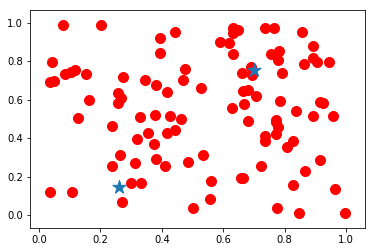

In [29]:
colors = np.array(['red', 'green'])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker='*', s=200)
plt.show()